## Однородные координаты. Преобразование фигуры

1. Задать пятиугольник с произвольными координатами.
2. Осуществить следующие операции:
    * смещение,
    * масштабирование,
    * поворот на угол,
    * зеркальное отображение по одной из осей.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Координаты пятиугольника:
https://www.mathopenref.com/coordpolycalc.html

In [68]:
shape = np.array([[0, -10], [-10, -3], [-6, 8], [6, 8], [10, -3]])

In [69]:
type(shape)

numpy.ndarray

In [177]:
def print_shape(shape, changed_shape=shape):
    shape = np.vstack([shape, shape[0]]) # для замыкания контура
    changed_shape = np.vstack([changed_shape, changed_shape[0]])
    
    plt.figure(figsize=(5, 5), dpi=80)
    plt.xlim(-15, 15)
    plt.ylim(-15, 15)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid()
    plt.plot(changed_shape[:,0], changed_shape[:,1], color='blue', label='New shape')
    plt.plot(shape[:,0], shape[:,1], color='green', label='Old shape')
    plt.legend()
    
    plt.show()

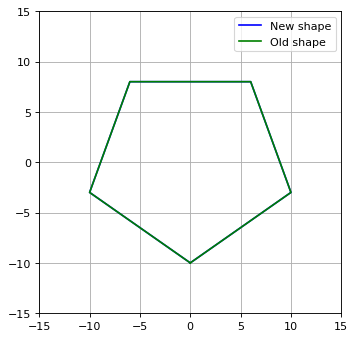

In [178]:
print_shape(shape)

In [186]:
def move(shape, offset_x, offset_y):
    shape = np.hstack((shape, np.ones((shape.shape[0], 1)))) # нормализация однородных координат
    offset_matrix = np.array([[1, 0, 0],
                             [0, 1, 0],
                             [offset_x, offset_y, 1]])
    new_shape = []
    for point in shape:
        new_shape.append(point.dot(offset_matrix))
    new_shape = np.array(new_shape)
    new_shape = new_shape[:, :-1]
    return new_shape

In [187]:
new_shape = move(shape, 5, 5)

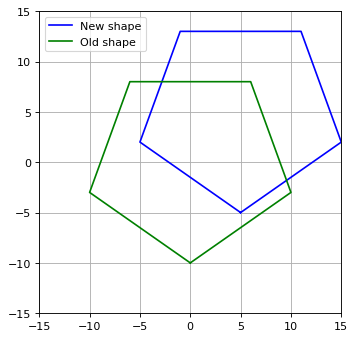

In [188]:
print_shape(shape, new_shape)

In [189]:
def resize(shape, scale_x, scale_y):
    shape = np.hstack((shape, np.ones((shape.shape[0], 1)))) # нормализация однородных координат
    resize_matrix = np.array([[scale_x, 0, 0],
                             [0, scale_y, 0],
                             [0, 0, 1]])
    new_shape = []
    for point in shape:
        new_shape.append(point.dot(resize_matrix))
    new_shape = np.array(new_shape)
    new_shape = new_shape[:, :-1]
    return new_shape

In [190]:
new_shape = resize(shape, 1.5, 0.5)

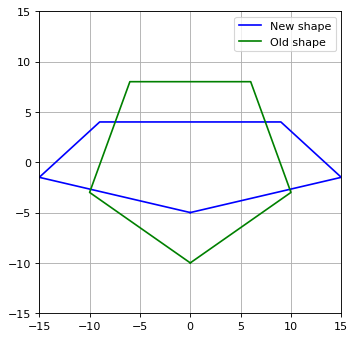

In [191]:
print_shape(shape, new_shape)

In [192]:
def rotate(shape, angle):
    angle = np.deg2rad(angle) # конвертация из градусов в радианы
    shape = np.hstack((shape, np.ones((shape.shape[0], 1)))) # нормализация однородных координат
    rotate_matrix = np.array([[np.cos(angle), np.sin(angle), 0],
                             [-np.sin(angle), np.cos(angle), 0],
                             [0, 0, 1]])
    new_shape = []
    for point in shape:
        new_shape.append(point.dot(rotate_matrix))
    new_shape = np.array(new_shape)
    new_shape = new_shape[:, :-1]
    return new_shape

In [193]:
new_shape = rotate(shape, 45)

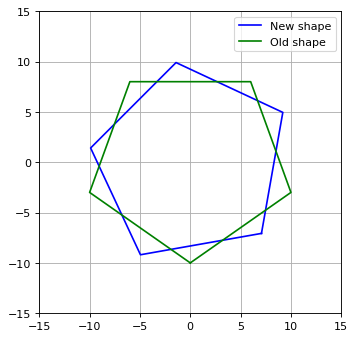

In [194]:
print_shape(shape, new_shape)

In [207]:
def reflect(shape, type):
    if type == 'diag':
        reflect_matrix = np.array([[0, 1, 0],
                                   [1, 0, 0],
                                   [0, 0, 1]])
    elif type == 'y':
        reflect_matrix = np.array([[-1, 0, 0],
                                   [0, 1, 0],
                                   [0, 0, 1]])
    elif type == 'x':
        reflect_matrix = np.array([[1, 0, 0],
                                   [0, -1, 0],
                                   [0, 0, 1]])
    elif type == 'zero':
        reflect_matrix = np.array([[-1, 0, 0],
                                   [0, -1, 0],
                                   [0, 0, 1]])
    else:
        raise Exception(f'Can\'t find this ({type}) type of reflection. Try again.')
    
    shape = np.hstack((shape, np.ones((shape.shape[0], 1)))) # нормализация однородных координат
    
    new_shape = []
    for point in shape:
        new_shape.append(point.dot(reflect_matrix))
    new_shape = np.array(new_shape)
    new_shape = new_shape[:, :-1]
    return new_shape

In [208]:
new_shape = reflect(shape, 'diag')

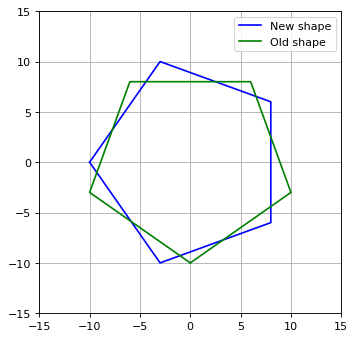

In [209]:
print_shape(shape, new_shape)

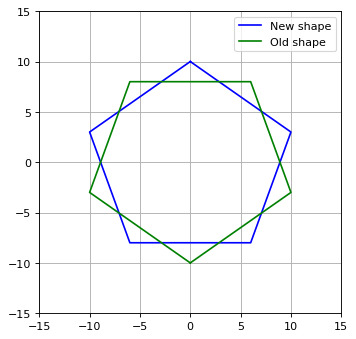

In [210]:
new_shape = reflect(shape, 'x')
print_shape(shape, new_shape)

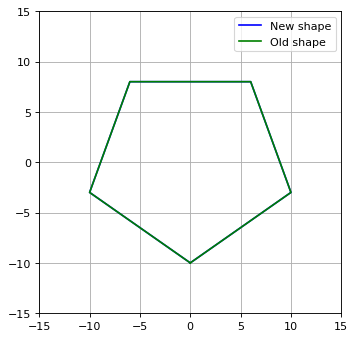

In [211]:
new_shape = reflect(shape, 'y')
print_shape(shape, new_shape)

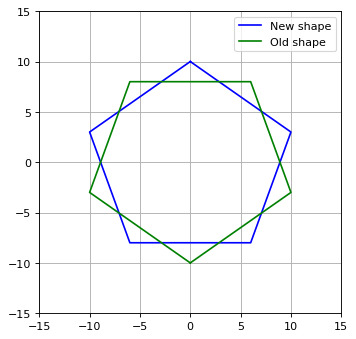

In [212]:
new_shape = reflect(shape, 'zero')
print_shape(shape, new_shape)